<h1 style="color:red" align="center">Explore Credit Score Table<h1>

In [3]:
import pandas as pd

df_customers = pd.read_csv('datasets/customers.csv')
df_credit = pd.read_csv('datasets/credit_profiles.csv')

df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [ ]:
# step:1 > checking that is there any duplications is avilable
# step:2 > checking is there any null value into the dataframe

In [5]:
df_credit.shape, df_customers.shape

# as we can see the records are of same peoples but still one table has more recods : may be duplication or anything

((1004, 6), (1000, 8))

In [7]:
# finding how many unique ids, means there are some duplications

df_credit['cust_id'].nunique()

1000

In [13]:
df_credit[df_credit['cust_id'].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [23]:
df_credit_clean = df_credit.drop_duplicates(subset = 'cust_id', keep = 'last')
df_credit_clean.shape

(1000, 6)

In [21]:
df_credit_clean.shape, df_customers.shape

((1000, 6), (1000, 8))

In [24]:
df_credit_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [32]:
# identifying the rows having null credit

df_credit_clean[df_credit_clean.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [33]:
# checking at which credit_limit how many people are there

df_credit_clean.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

In [ ]:
# finding the relation bw credit_score and credit_limit to fill the Nan vlaues

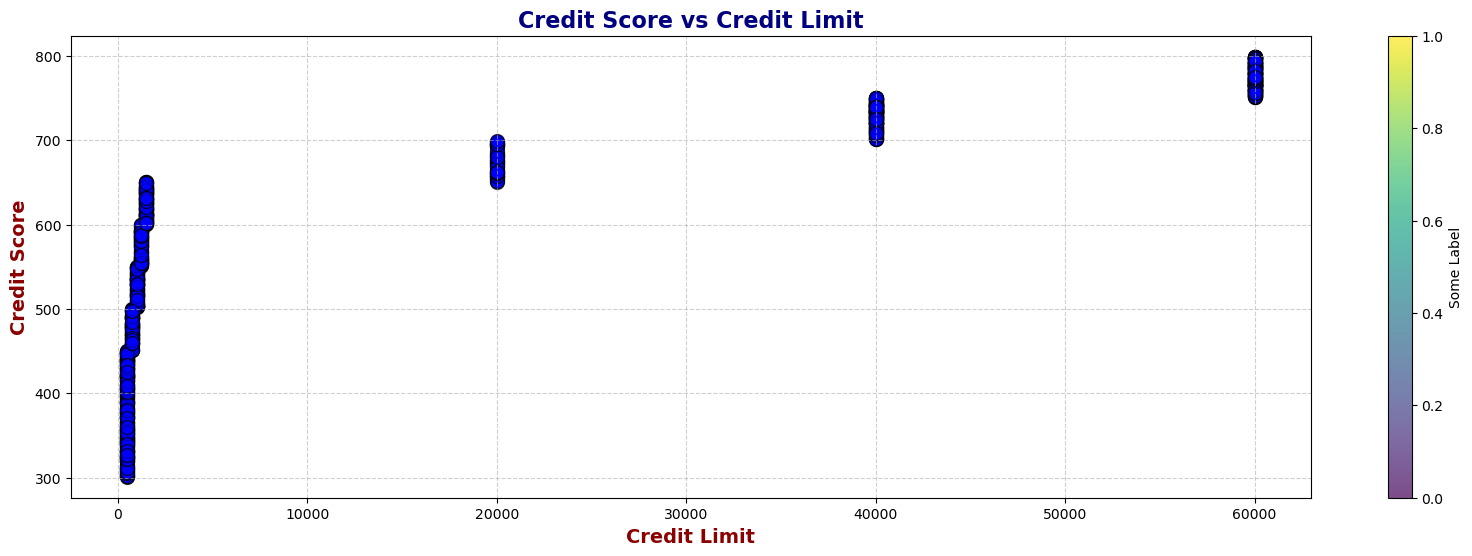

In [46]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(20, 6))  # Set the figure size for better visibility
plt.scatter(df_credit_clean.credit_limit, df_credit_clean.credit_score, 
            c='blue', edgecolor='k', alpha=0.7, s=100, marker='o')

# Add a title and labels with styling
plt.title('Credit Score vs Credit Limit', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Credit Limit', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Credit Score', fontsize=14, fontweight='bold', color='darkred')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adding a color bar (optional) if you have categories or a third variable
plt.colorbar(label='Some Label', orientation='vertical')

# Show the plot
plt.show()

### Now makeing the range for the credit_score limit

In [52]:
import pandas as pd

# Step 1: Define the bin edges
bin_edges = [300, 450, 500, 550, 600, 650, 700, 750, 800]  # Example bin edges for credit scores

# Step 2: Define the bin labels
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges) - 1)]
bin_labels

# Step 3: Use pd.cut to create the 'credit_score_range' column
df_credit_clean['credit_score_range'] = pd.cut(df_credit_clean['credit_score'], 
                                               bins=bin_edges, 
                                               labels=bin_labels, 
                                               include_lowest=True)

# Display the DataFrame to see the new column
df_credit_clean.head()

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_12673/4195965268.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_clean['credit_score_range'] = pd.cut(df_credit_clean['credit_score'],


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [55]:
# Now just checking for perticular range of df

df_credit_clean[df_credit_clean['credit_score_range'] == "700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [ ]:
# Now grouping the df on the basis of credit_score_range

In [66]:
df_mode = df_credit_clean .groupby('credit_score_range')['credit_limit'].apply(lambda x: x.mode().iloc[0]).reset_index()
df_mode 

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_12673/942970795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mode = df_credit_clean .groupby('credit_score_range')['credit_limit'].apply(lambda x: x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [79]:
df_credit_clean[df_credit_clean.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
809,806,617,0.421308,416.0,1.0,NaN,600-649
430,431,610,0.741063,628.0,4.0,NaN,600-649
666,663,478,0.154754,84.0,0.0,NaN,450-499


In [ ]:
# Now merge the df_mode df into hte df_credit_clean 

In [3]:
# Merge the mode values back with the original DataFrame
import pandas as pd

df_credit_clean_2 = pd.merge(df_credit_clean, df_mode, on="credit_score_range", suffixes=("", "_mode"))
df_credit_clean_2.sample(3)



NameError: name 'df_credit_clean' is not defined

In [85]:
df_credit_clean_2[df_credit_clean_2['credit_limit'].isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
430,431,610,0.741063,628.0,4.0,NaN,600-649,1500.0
342,343,733,0.646581,20948.0,2.0,NaN,700-749,40000.0
399,400,754,0.884299,32031.0,2.0,NaN,750-799,60000.0


In [87]:
df_credit_clean_3 = df_credit_clean_2.copy()
df_credit_clean_3['credit_limit'].fillna(df_credit_clean_3['credit_limit_mode'], inplace=True)

#checking any Nan value is remaining or not
df_credit_clean_3.isnull().sum()

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_12673/3807225878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit_clean_3['credit_limit'].fillna(df_credit_clean_3['credit_limit_mode'], inplace=True)


cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

## Data Cleaning Step 3: Handle Outliers: outstanding_debt

In [88]:
df_credit_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


Text(0.5, 1.0, 'Box plot for outstanding debt')

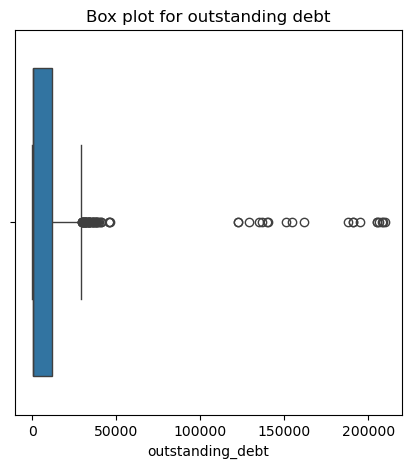

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.boxplot(x=df_credit_clean_3['outstanding_debt'])
plt.title('Box plot for outstanding debt')

In [ ]:
# as we can see in the column of outstanding_debt the max(outstanding_debt) > credit_limit [NOT POSSIBLE] treating them as a outlier

In [89]:
df_credit_clean_3[df_credit_clean_3['outstanding_debt'] > df_credit_clean_3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [ ]:
# a persong having more debt then the credit_limit so for that we replace the debt value to the credit_limit because the person cannot use 
# the card  after the limit as well .

In [91]:
# Update the 'outstanding_debt' column where 'outstanding_debt' is greater than 'credit_limit' with the help of loc funtion
# We use the loc function in pandas to access and modify rows and columns in a DataFrame based on labels or boolean conditions.

df_credit_clean_3.loc[df_credit_clean_3['outstanding_debt'] > df_credit_clean_3['credit_limit'], 'outstanding_debt']

Series([], Name: outstanding_debt, dtype: float64)

In [92]:
df_credit_clean_3[df_credit_clean_3['outstanding_debt'] > df_credit_clean_3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [ ]:
# so as we can see that there is no outlier left 

## Data Exploration: Visualizing Correlation in Credit Score Table

In [5]:
import pandas as pd

df_customers = pd.read_csv('datasets/customers.csv')
df_customers.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married


In [17]:
# df_credit_clean = pd.read_csv('datasets/credit_profiles.csv')
# df_credit_clean = df_credit.drop_duplicates(subset = 'cust_id', keep = 'last')

# Step 1: Define the bin edges
bin_edges = [300, 450, 500, 550, 600, 650, 700, 750, 800]  # Example bin edges for credit scores

# Step 2: Define the bin labels
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges) - 1)]
bin_labels

# Step 3: Use pd.cut to create the 'credit_score_range' column
df_credit_clean['credit_score_range'] = pd.cut(df_credit_clean['credit_score'], 
                                               bins=bin_edges, 
                                               labels=bin_labels, 
                                               include_lowest=True)
df_mode = df_credit_clean .groupby('credit_score_range')['credit_limit'].apply(lambda x: x.mode().iloc[0]).reset_index()
df_credit_clean_2 = pd.merge(df_credit_clean, df_mode, on="credit_score_range", suffixes=("", "_mode"))
df_credit_clean_3 = df_credit_clean_2.copy()
df_credit_clean_3.head(3)

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_3214/325122509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_clean['credit_score_range'] = pd.cut(df_credit_clean['credit_score'],
/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_3214/325122509.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mode = df_credit_clean .groupby('credit_score_range')['credit_limit'].apply(lambda x: x.mode().iloc[0]).reset_index()


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0


In [18]:
df_merge = df_customers.merge(df_credit_clean_3, on='cust_id', how='inner')
df_merge.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,544,0.854807,513.0,4.0,1000.0,500-549,1000.0


In [19]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = df_merge[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.306026,0.844279,0.573939,0.356911
credit_utilisation,-0.070445,1.000000,0.046540,-0.084046,-0.099406,-0.026364
outstanding_debt,0.306026,0.046540,1.000000,0.361906,0.269808,0.179232
credit_limit,0.844279,-0.084046,0.361906,1.000000,0.681139,0.412956
annual_income,0.573939,-0.099406,0.269808,0.681139,1.000000,0.471740
age,0.356911,-0.026364,0.179232,0.412956,0.471740,1.000000


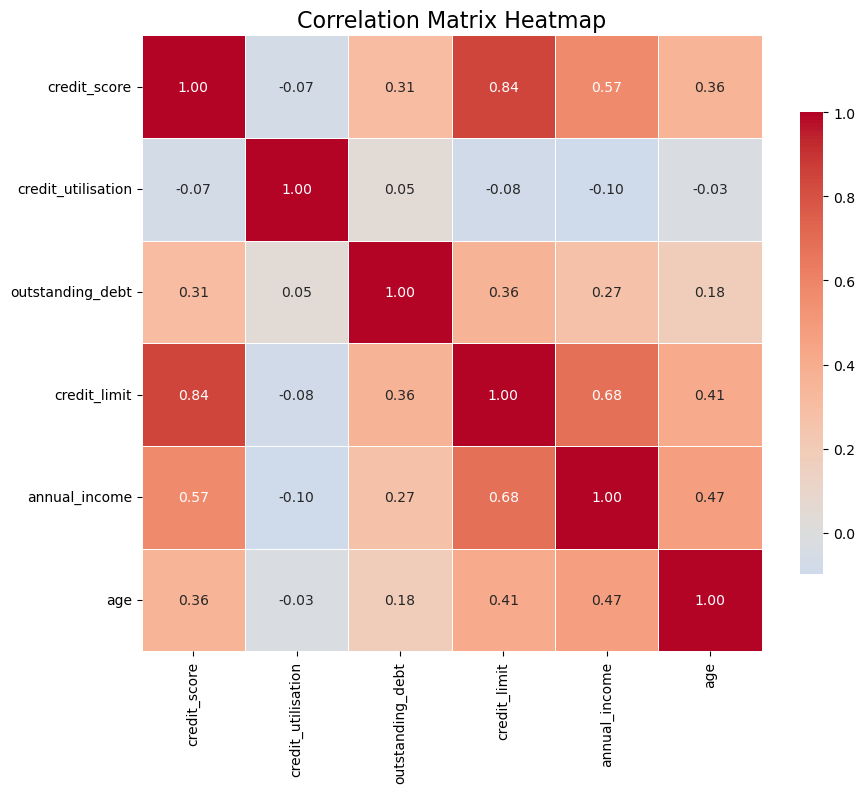

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with enhancements
sns.heatmap(
    correlation_matrix, 
    annot=True,          # Display the correlation values
    fmt=".2f",           # Format the annotations to 2 decimal places
    cmap='coolwarm',     # Use a diverging color palette
    center=0,            # Center the colormap at 0
    linewidths=0.5,      # Add lines between squares for better separation
    cbar_kws={'shrink': 0.75},  # Adjust the color bar size
    annot_kws={'size': 10}  # Adjust the annotation font size
)

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()
